In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import altair as alt
final_df = pd.read_json('data/final_data.json')

In [23]:
# print(final_df.head(15))

In [11]:
# Scope the dataset

# print("The shape of the dataframe is: \n", final_df.shape)
# print("\nThe details of the dataframe is as follows: \n", final_df.info)
# print("\nThe description of the dataframe is like so: \n", final_df.describe())

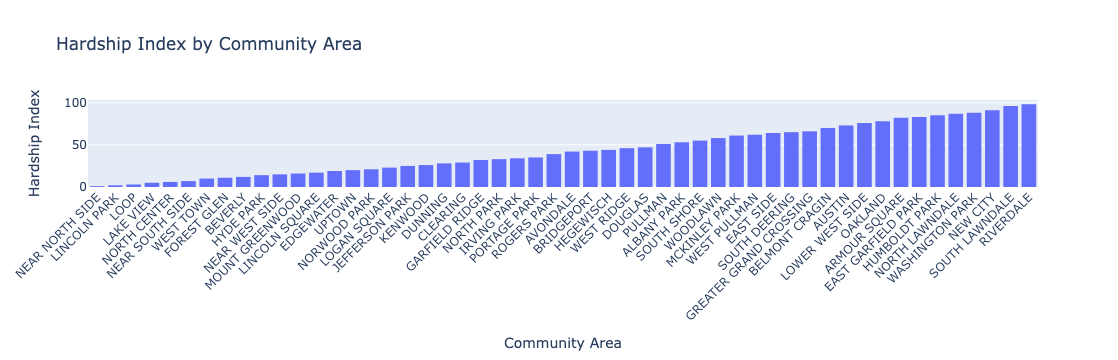

In [12]:
# Define the columns to be used
required_cols = ["COMMUNITY AREA NAME", "HARDSHIP INDEX"]

# Extract the required columns and sort by "HARDSHIP INDEX"
vis_df = final_df[required_cols].sort_values(by=["HARDSHIP INDEX"])

# Create an interactive bar plot with tooltips using Plotly Express
fig = px.bar(vis_df, x="COMMUNITY AREA NAME", y="HARDSHIP INDEX", 
             title="Hardship Index by Community Area",
             labels={"HARDSHIP INDEX": "Hardship Index", "COMMUNITY AREA NAME": "Community Area"},
             hover_data={"COMMUNITY AREA NAME": True, "HARDSHIP INDEX": True},
             color_discrete_sequence=["#636EFA"])  # Adjust color palette if needed

# Customize layout
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(type='category'))
fig.update_traces(marker_line_width=0)  # Remove marker lines for cleaner appearance

# Show the interactive plot
fig.show()

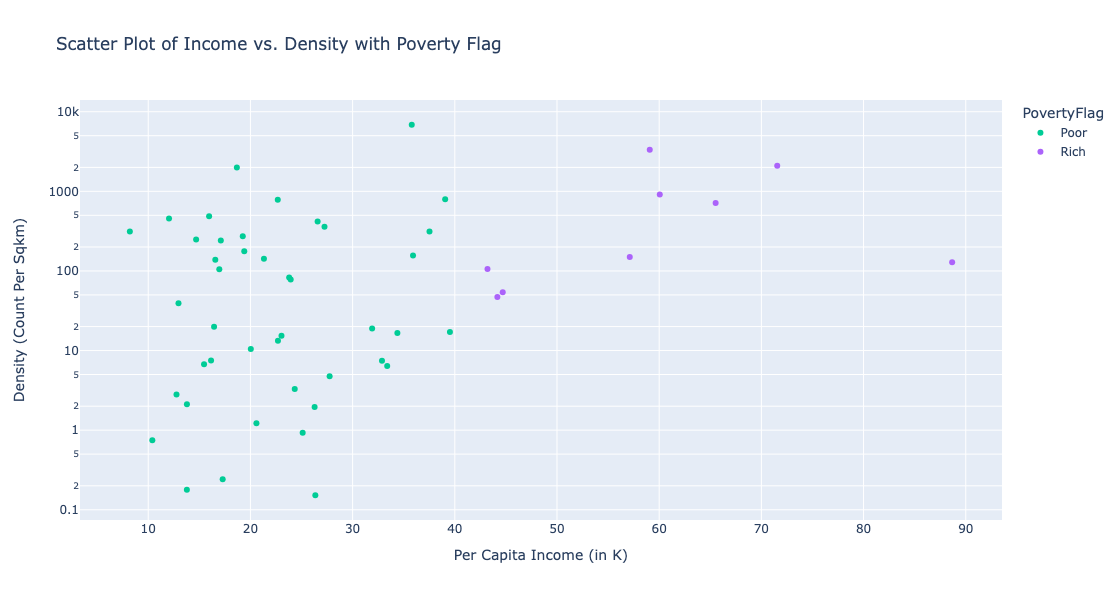

In [13]:
# Define the columns to be used
required_cols = ["CountPerSqkm", "PER CAPITA INCOME IN K", "PovertyFlag"]

# Extract the required columns
vis_df = final_df[required_cols]

# Create a scatter plot with tooltips using Plotly Express
fig = px.scatter(vis_df, x='PER CAPITA INCOME IN K', y='CountPerSqkm', color='PovertyFlag',
                 color_discrete_map={0: '#636EFA', 1: '#FFA15A'},
                 title="Scatter Plot of Income vs. Density with Poverty Flag",
                 labels={"PER CAPITA INCOME IN K": "Per Capita Income (in K)",
                         "CountPerSqkm": "Density (Count Per Sqkm)"},
                 hover_data={"PovertyFlag": True},
                 width=800, height=600)

# Set y-axis to logarithmic scale for better visualization
fig.update_layout(yaxis_type="log")

# Show the interactive plot
fig.show()

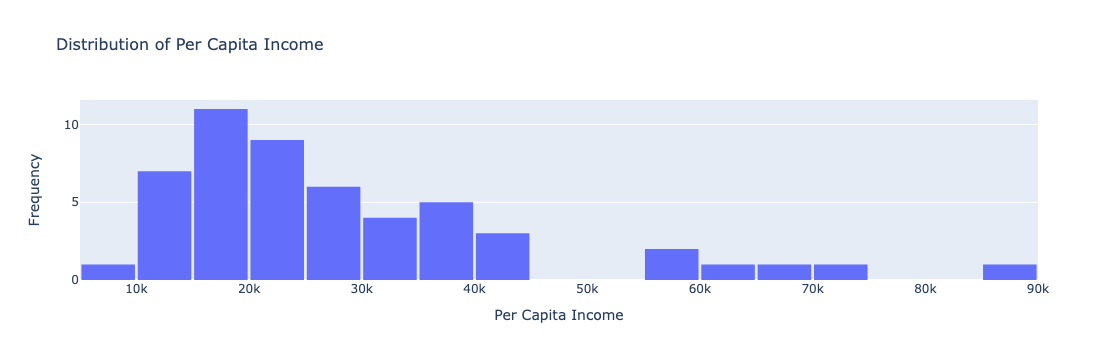

In [14]:
# Create histogram with Plotly Express
fig = px.histogram(final_df, x='PER CAPITA INCOME', nbins=20, 
                   labels={'count': 'Frequency', 'PER CAPITA INCOME': 'Per Capita Income'},
                   title='Distribution of Per Capita Income')

# Update layout for better appearance
fig.update_layout(
    bargap=0.05,  # Gap between bars
    xaxis=dict(title='Per Capita Income'),  # X-axis label
    yaxis=dict(title='Frequency'),  # Y-axis label
    title_font=dict(size=16),  # Title font size
    font=dict(size=12)  # Axis labels font size
)

# Show the plot
fig.show()

In [15]:
# Create a selection for the click
click = alt.selection_single(on='click', fields=['PER CAPITA INCOME'], empty='none')

# Scatter plot
scatter = alt.Chart(final_df).mark_circle().encode(
    x='PER CAPITA INCOME:Q',
    y='HARDSHIP INDEX:Q',
    color=alt.condition(click, alt.value('black'), alt.Color('PovertyFlag:N', scale=alt.Scale(domain=['Rich', 'Poor'], range=['#636EFA', '#FFA15A']))),
    tooltip=['PER CAPITA INCOME:Q', 'HARDSHIP INDEX:Q']
).properties(
    width='container',
    height=300
).add_selection(
    click
).interactive()

bars_selected = alt.Chart(final_df).mark_bar().encode(
    y=alt.Y('COMMUNITY AREA NAME:N', axis=alt.Axis(labelFontSize=6)),  # Adjust font size for y-axis labels
    x=alt.X('HARDSHIP INDEX:Q', axis=alt.Axis(titleFontSize=14, labelFontSize=12)),  # Adjust font size for x-axis labels and title
    color=alt.condition(click,
                        alt.Color('PovertyFlag:N', scale=alt.Scale(domain=['Rich', 'Poor'], range=['#FFA15A', '#636EFA'])),
                        alt.value('#EAEAEA')),  # Default color for unselected bars
    tooltip=['COMMUNITY AREA NAME:N', 'HARDSHIP INDEX:Q', 'PovertyFlag:N']
).properties(
    height=300,
    width=600
).interactive()

# Combine the charts with two layers for the bar chart
linked_charts = alt.vconcat(scatter, bars_selected)
# Show the linked charts
linked_charts

/usr/lib/python3/dist-packages/altair/utils/core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



alt.VConcatChart(...)

In [ ]:
# import pandas as pd
# import numpy as np
# import altair as alt

# # Assuming your data is loaded into a dataframe called 'final_df'

# # Create selection for heatmap based on column names
# select_x = alt.selection_single(fields=['level_0'], name='select_x', init={'level_0': 'PERCENT HOUSEHOLDS BELOW POVERTY'})  # Initial value for brushing
# select_y = alt.selection_single(fields=['level_1'], name='select_y', init={'level_1': 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'})  # Initial value for brushing

# # Define brush interaction for heatmap
# # brush = alt.selection_interval(encodings=['x'], bind='scales', on="[mousedown[event.altKey], window:mouseup] > window:mousemove!", translate="[mousedown[event.altKey], window:mouseup] > window:mousemove!", zoom="wheel![event.altKey]")
# brush = alt.selection_multi(fields=['level_0', 'level_1'], on='click')

# # Create heatmap chart with correlation matrix of relevant columns
# heatmap = (
#     alt.Chart(final_df[['PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']].corr().stack().reset_index().rename(columns={0: 'correlation'}), title='Click a tile to compare percentages', height=250, width=250)
#     .mark_rect()
#     .encode(
#         alt.X('level_0:N', title='Percentage', scale=alt.Scale(paddingInner=0)),  # Change data type to nominal
#         alt.Y('level_1:N', title='Percentage', scale=alt.Scale(paddingInner=0)),  # Change data type to nominal
#         alt.Color('correlation:Q', scale=alt.Scale(domain=[-1, 1], scheme='blueorange')),
#         opacity=alt.condition(select_x | select_y, alt.value(1), alt.value(0.4)),
#         tooltip=[  # Add tooltip encoding for hover information
#             alt.Tooltip('level_0:N', title='Percentage 1'),  # Change data type to nominal
#             alt.Tooltip('level_1:N', title='Percentage 2'),  # Change data type to nominal
#             alt.Tooltip('correlation:Q', title='Correlation')
#         ]
#     )
#     .add_selection(select_x, select_y)
#     .add_selection(brush)  # Add brush interaction
#     .interactive()
# )

# # Create area chart for the percentage of households below poverty
# area_chart = (
#     alt.Chart(final_df)
#     .mark_area(opacity=0.7)
#     .encode(
#         x=alt.X('Community Area Number:N', title='Community Area Number'),
#         y=alt.Y('PERCENT HOUSEHOLDS BELOW POVERTY:Q', title='Percentage of Households Below Poverty'),
#         color=alt.value('#4CAF50')  # Green color
#     )
#     .properties(title='Percentage of Households Below Poverty Across Community Areas')
#     .interactive()
# )

# # Filter area chart based on heatmap selection (using brush)
# area_chart_filtered = area_chart.transform_filter(
#     brush  # Reference the brush interaction
# )

# # Add continuous tooltip for the percentage of households below poverty chart
# area_chart_tooltip = area_chart_filtered.encode(
#     tooltip=['Community Area Number:N', alt.Tooltip('PERCENT HOUSEHOLDS BELOW POVERTY:Q', title='Percentage of Households Below Poverty')]
# )

# # Create area chart for the percentage aged 25+ without a high school diploma
# overlay_chart = (
#     alt.Chart(final_df)
#     .mark_area(opacity=0.7)
#     .encode(
#         x=alt.X('Community Area Number:N', title='Community Area Number'),
#         y=alt.Y('PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA:Q', title='Percentage Aged 25+ Without High School Diploma'),
#         color=alt.value('rgba(255, 193, 7, 0.7)')  # Yellow color with opacity
#     )
#     .properties(title='Overlay of Percentage Aged 25+ Without High School Diploma on Percentage of Households Below Poverty')
#     .interactive()
# )

# # Filter overlay chart based on heatmap selection (using brush)
# overlay_chart_filtered = overlay_chart.transform_filter(
#     brush  # Reference the brush interaction
# )

# # Combine the charts
# (heatmap | area_chart_tooltip) & overlay_chart_filtered
